In [1]:
import sklearn
import requests
import json
import spotipy#authentication
import spotipy.util as util#authentication
from spotipy.oauth2 import SpotifyClientCredentials#authentication

## Authenticate

In [2]:
# Make sure to fill in your spotify client_secret information
cid = "049ade7215e54c63a2b628f3784dc407"
secret = "171ef0fc408745e88dd5b99b83291146"
redirect_uri = 'http://google.com/'
username = 'xxx'

In [3]:
#End points
sp_tracks = 'https://api.spotify.com/v1/me/tracks?limit=50'
sp_profile = 'https://api.spotify.com/v1/me'

In [4]:
scope = 'user-library-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
    
else:
    print("Can't get token for", username)

## Get User Tracks

In [5]:
def tp_req(next_url):
    try:
        resp = requests.get(url=next_url,
                        headers={'Authorization': 'Bearer ' + token})
        resp.raise_for_status()

    except requests.exceptions.HTTPError as err:
        print(err)

        
    response = resp.json()
    return response

In [6]:
class TSP:
    def __init__(self):
        self.all_song_info = {}
        
    def get_user_profile():
        response = tp_req(sp_profile)
        key_dict = {
            'uri': response['uri']
        } 
        return key_dict
    
    def get_user_tracks():
        def get_tracks(next_url):

            response = tp_req(next_url)

            track_limit = (response['limit'])-1

            for x in range(track_limit):

                try:
                    track_uri = response['items'][x]['track']['uri'].split(':')
                    track_name = response['items'][x]['track']['name']
                    tracks.append({'track_uri':track_uri[2],'track_name':track_name})

                except IndexError as error:
                    continue


            try:
                if (next_url is not None):
                    get_tracks(response['next'])
                   
                else:
                    print('hi')
            except:
                return

        tracks = []
        b = get_tracks(sp_tracks)
        return tracks
        
        

In [7]:
user = TSP

In [8]:
ident = user.get_user_profile()

In [9]:
ident

{'uri': 'spotify:user:124399179'}

In [10]:
import pandas as pd
tracks = user.get_user_tracks()
user_tracks = pd.DataFrame(tracks)

In [11]:
user_tracks

,track_uri,track_name
0,77twNSIfocVOx6xdEOLrJY,Wings On My Penis - feat. Lil Tommy Terror
1,6ZD6KxJrALrxyx0E01Rkgf,Nterini - Sparrow & Barbossa Remix
2,4hRFcET7yoxEUOTSPnZS8f,YEK 128–10
3,3NvmrBWdvhThiSCZepXvRd,Pledge
4,0eEgMbSzOHmkOeVuNC3E0k,Kids with Guns
...,...,...
5990,0PhOISlDStrQ2OA95Mt5di,Invincibility of Youth
5991,1QwMsUyMKjHXutqpfhLSQX,One Last Hurrah
5992,1EtnerdQGX4shiLF8YhzGY,Alkaline
5993,4M07IiNsHkwbq903FyDksl,Turquoise


## Compare User Tracks

In [12]:
import boto3
from s3 import get_file


In [13]:
def data(data):
    df = pd.read_csv(data,sep='|')
    return df

In [14]:
s3 = boto3.resource('s3')

bucket = 's3ssp'

In [15]:
db_tracks = data(get_file(s3,bucket,download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file = 'master_train_playlist.csv'))

In [16]:
dataset = user_tracks.merge(db_tracks,left_on ='track_uri',right_on='track_uri')

In [17]:
dataset

,track_uri,track_name_x,artist_name,track_name_y,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness,lyrics
0,77twNSIfocVOx6xdEOLrJY,Wings On My Penis - feat. Lil Tommy Terror,Die Antwoord,wings on my penis - feat. lil tommy terror,0.130000,0.900,0.379,0.4380,0.000000,5.0,0.0,0.0630,0.4060,4.0,92.912,-10.520,god wake wing penis amen huh yeah hey fuck shi...
1,0eEgMbSzOHmkOeVuNC3E0k,Kids with Guns,Gorillaz,kids with guns,0.000417,0.838,0.475,0.7110,0.714000,4.0,0.0,0.2260,0.0360,4.0,106.217,-5.505,kid gun kid gun win mesmerized skeleton kid gu...
2,3oKX2xnyyWbkXFPWkL7ncF,The Kindness of Strangers,The American Analog Set,the kindness of strangers,0.560000,0.640,0.584,0.4200,0.470000,7.0,1.0,0.1110,0.0345,4.0,129.032,-10.787,doubt moment savor dad coda speak anger word k...
3,44ETQCGE31ypmEc5ut3WMe,Cashout,Fugazi,cashout,0.099800,0.631,0.682,0.8710,0.770000,6.0,1.0,0.0344,0.0287,4.0,102.055,-9.143,morning eviction carry landlord furniture side...
4,2CBxS6Xzq7I2hu87CXDx0a,Kick In The Eye,Bauhaus,kick in the eye,0.001860,0.686,0.670,0.8290,0.007520,7.0,1.0,0.0530,0.0688,4.0,120.605,-9.545,speak pasture green journey age throat feel dr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2KHRENHQzTIQ001nlP9Gdc,Contact,Daft Punk,contact,0.002820,0.400,0.756,0.0924,0.753000,11.0,0.0,0.0695,0.0492,4.0,123.828,-8.423,hey bob jack talk particle nearby bright objec...
84,7Agy86rG456dpiHs8WXC9h,Natural Selection,Animal Collective,natural selection,0.000385,0.459,0.877,0.7400,0.000002,0.0,1.0,0.0860,0.1560,4.0,156.073,-4.842,mess plan truth ground steering wheel rest han...
85,1iTkK3Tt6FXjNx5obJrZCq,Lying in the Grass,Animal Collective,lying in the grass,0.023300,0.735,0.864,0.4780,0.000028,10.0,0.0,0.2170,0.0587,4.0,119.983,-6.412,walk foot father knee reach mother nose scream...
86,4mjLOHZRthpp6YFpaFGWWX,Hocus Pocus,Animal Collective,hocus pocus,0.235000,0.564,0.564,0.7680,0.000000,10.0,1.0,0.1340,0.0494,4.0,155.878,-7.426,freeway morning dinosaur worry wait border sho...


## LDA Topic Modeling

In [18]:
class Model:
    
        
    def LDA(n_components):
        

        
        return LDA  
    
    
    def get_playlists(lda_model):
        
    
        # Create Document - Topic Matrix

        

        # column names
        topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]


        # index names
        docnames = [dataset['track_uri'].iloc[i] for i in range(len(dataset['lyrics']))]



        # Make the pandas dataframe
        df_document_topic = pd.DataFrame(np.array(lda_output), columns=topicnames, index=docnames)

        # Get dominant topic for each document
        dominant_topic = np.argmax(df_document_topic.values, axis=1)


        df_document_topic['dominant_topic'] = dominant_topic
        
        
        return df_document_topic


    

    def get_playlist_elements(df_document_topic):
        df_tsp = []


        for col in df_document_topic.columns:

            if col != 'dominant_topic':

                topic_length= df_document_topic[df_document_topic[col]>=.60].nlargest(n=20, columns=col)

                chosen_topic = topic_length[col]

                if len(chosen_topic)>=2:

                    for track_uri in chosen_topic.index:


                        df_tsp.append({'playlist':col,'track_uri':track_uri})



        topic_groupings = pd.DataFrame(df_tsp)     

        playlists = topic_groupings.merge(dataset,on='track_uri',how='left')
        
        playlist_agg = playlists.groupby('playlist').median()
        
        
        return [playlists,playlist_agg]
        
        


    
 


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from yellowbrick.text import FreqDistVisualizer
import numpy as np


LDA = LatentDirichletAllocation(n_components=30, learning_method="batch",
                                max_iter=2, random_state=0)

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=.2, max_df=.5,     # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=500)             # max number of uniq words



data_vectorized = vectorizer.fit_transform(dataset['lyrics'].values.astype('U'))
        
        
LDA.fit(data_vectorized)


lda_output = LDA.transform(data_vectorized)


df_playlists = Model.get_playlists(LDA)

df_send = Model.get_playlist_elements(df_playlists)

df_base = df_send[0]

df_predict = df_send[1].reset_index()
df_predict_class = df_send[1].reset_index()

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
n_words = 3

topic_words = []

def get_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic{x}: ".format(x=topic_idx)
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        
        topic_words.append({'words':message})
        
        print(message)
    print()
    
    
print("\nTopics in LDA model:")
cv_feature_names = vectorizer.get_feature_names()
#print_top_words(LDA, cv_feature_names, n_words)

topic_list = get_top_words(LDA, cv_feature_names, n_words)


Topics in LDA model:
Topic0: mind leave love
Topic1: time mind love
Topic2: mind leave love
Topic3: mind love leave
Topic4: leave love mind
Topic5: leave love time
Topic6: time mind love
Topic7: time mind love
Topic8: time mind love
Topic9: time mind love
Topic10: time mind love
Topic11: love mind leave
Topic12: time leave mind
Topic13: time mind love
Topic14: love time mind
Topic15: leave love time
Topic16: leave love mind
Topic17: time love leave
Topic18: time mind love
Topic19: time mind love
Topic20: time love leave
Topic21: leave mind time
Topic22: love time leave
Topic23: time mind love
Topic24: time mind love
Topic25: time mind love
Topic26: time love mind
Topic27: time mind leave
Topic28: leave mind time
Topic29: leave mind love



In [21]:
df_topics = pd.DataFrame(topic_words)
df_topics[['playlist','words']] = df_topics.words.str.split(':',expand=True)

In [22]:
df_predict_class

,playlist,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness
0,Topic11,0.083750,0.6315,0.6640,0.6700,0.002655,2.5,0.5,0.11010,0.03455,4.0,127.5095,-7.2785
1,Topic15,0.008010,0.5290,0.7680,0.4910,0.019200,2.0,1.0,0.10000,0.03270,4.0,131.0630,-6.3870
2,Topic19,0.014428,0.4155,0.7620,0.4220,0.383705,2.5,0.0,0.10880,0.05365,4.0,129.4145,-9.8640
3,Topic2,0.097950,0.6130,0.7865,0.2555,0.028660,5.5,0.0,0.34290,0.06210,4.0,109.2690,-4.1235
4,Topic22,0.415305,0.4375,0.6055,0.4305,0.002126,6.0,1.0,0.17935,0.04050,3.5,124.0900,-8.5395
5,Topic26,0.244000,0.5610,0.7080,0.4205,0.457500,6.5,1.0,0.18900,0.04065,4.0,109.0125,-7.3040
6,Topic3,0.396500,0.4080,0.6740,0.2015,0.042142,7.0,0.5,0.17000,0.15440,4.0,85.9220,-8.6175


## Classification

In [23]:
train_data = data(get_file(s3,bucket,download_file='Analysis_Data/master_train_playlist.csv',
                           rename_file = 'master_train_playlist.csv'))

test_data = data(get_file(s3,bucket,download_file='Analysis_Data/test_ssp.csv',rename_file = 'test.csv'))

In [24]:

df_predict_class = df_predict_class.reindex(sorted(df_predict_class.columns), axis=1)

df_train = train_data.reindex(sorted(train_data.columns), axis=1)


df_test = test_data.reindex(sorted(test_data.columns), axis=1)




In [25]:

df_predict_class = df_predict_class.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])


df_train = df_train.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])

df_test = df_test.drop(columns=['playlist','valence','danceability',
                      'energy','acousticness',
                               ])

In [26]:
def model(df_train,df_test,df_tsp):
        #Structure
        from sklearn.pipeline import Pipeline
        from sklearn.model_selection import train_test_split as tts
        from sklearn.model_selection import cross_val_score as cvs
    
        from sklearn.linear_model import LogisticRegression
        
        from sklearn.preprocessing import StandardScaler
        
        #Reports
        from yellowbrick.classifier import confusion_matrix
        
        #Metrics
        from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
    
        X = df_train[[col for col in df_train.columns if col != 'target']]

        y = df_train['target']

        X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)
        
        models = [
        #Standard Scaler,QuantileTransformer random_state=0
        
        Pipeline([
            ('std',StandardScaler()),
            ('reg',LogisticRegression())
        ])
        ]
        a = []
        for model in models:
            model.fit(X_train, y_train)
            #y_pred = model.predict(df_agg_ssp)
            _ = confusion_matrix(model, X_test, y_test,is_fitted=True)
            y_pred = model.predict(df_predict_class)
            #print({'Model':model[1],'Transformer':model[0],'Model Score':cvs(model,X_test,y_test)[3],
              #'F1 Score':f1_score(X_test,y_test),'Precision Score':precision_score(X_test,y_test),
              #'Recall Score':recall_score(X_test,y_test)
                     #})
            
        return y_pred

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


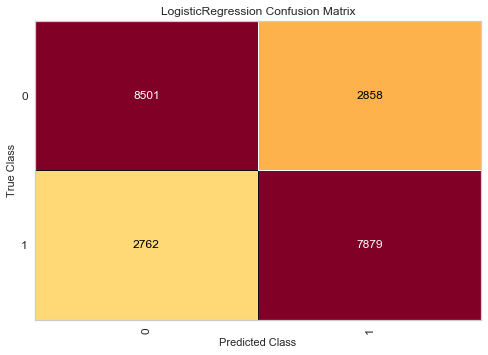

In [27]:
whoopy = model(df_train,df_test,df_predict_class)

In [28]:
whoopy

array([1, 1, 1, 1, 1, 1, 1])

In [29]:
import random
chosen_playlist = random.choice([index for index,a in enumerate(whoopy) if a == 1])

In [30]:
playlist_value = df_predict.iloc[chosen_playlist]


chosen_topic = playlist_value['playlist']

#chosen_topic = df_predict[df_predict['playlist']==playlist_value['playlist']]

In [31]:
tsp_deliverable = df_base[df_base['playlist']==chosen_topic]

In [32]:
tsp = tsp_deliverable.sort_values(by='valence',ascending=False)
tsp = tsp.reset_index()

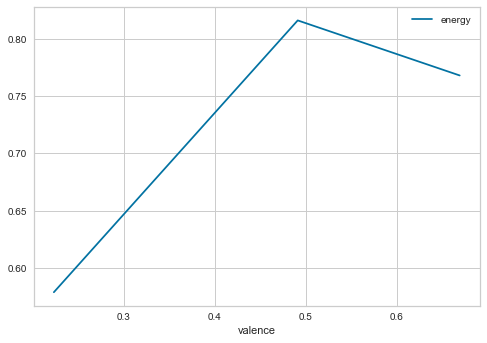

In [33]:
tsp.plot.line(x='valence',y='energy')

In [34]:
import requests
import json
import pandas as pd
import spotipy#authentication
import spotipy.util as util#authentication
from spotipy.oauth2 import SpotifyClientCredentials#authentication


cid = '049ade7215e54c63a2b628f3784dc407'
secret = '171ef0fc408745e88dd5b99b83291146'
redirect_uri = 'http://google.com/'
username = 'name'



#Authentication

scope = 'playlist-modify-private'
token_playlist = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_playlist:
    
    sp_playlist = spotipy.Spotify(auth=token_playlist)

else:
    
    print("Can't get token for", username)
    
#Authentication

scope = 'user-read-private'

token_user = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token_user:
    sp_user = spotipy.Spotify(auth=token_user)
else:
    print("Can't get token for", username)
    


Enter the URL you were redirected to: https://www.google.com/?code=AQC_jPuqyYRBUs59ZF-yy_Gp22ioF4XBK4cyfdQpBbgLRbdwtana-RYSzTm2EHYC3-Qq-PVyjNGJKw30Y2QL3PzkbiKXzoiqbqOEPukMEwTFs3dLO7V08dKusFQAkxwIh4Z-FX0pHIfev2iqONH5vy9UTG7ybUComgqw_-uAXdxI3_O9VIfjdsFfQKgjREs
Enter the URL you were redirected to: https://www.google.com/?code=AQCE6gUftSRE1oFNcGmon-WMb5Maze4RQDVe6of2IKyhB30wMV8TfugOI5WITM_e0xZ2QQiqo8Trvqw98J_zKwLjuAPg9ipA0dZWZ2PYbRI0mSDdvFe1kna1EcOUOJYbXzgeY4z50g6n2EBI4C3KMpNlcBWhni4qVDfmg4l8D1_R-V8PaRCTIPw


In [35]:
def get_user_id(url):
    try:
        resp = requests.get(url,headers={'Authorization': 'Bearer ' + token_user},
                           )
        
        resp.raise_for_status()
        
    except requests.exceptions.HTTPError as err:
        
        print(err)
        
    
    response = resp.json()
    userid = response['id']
    
    return userid

user_id = get_user_id('https://api.spotify.com/v1/me')

In [36]:
identification = user_id
identification

'124399179'

In [37]:
tsp

,index,playlist,track_uri,track_name_x,artist_name,track_name_y,acousticness,danceability,energy,valence,instrumentalness,key,mode,liveness,speechiness,time_signature,tempo,loudness,lyrics
0,8,Topic15,0OqqRz1GYFHjDeAqjB5zCC,Million Young,The American Analog Set,million young,0.01930,0.583,0.768,0.669,0.795000,2.0,1.0,0.0775,0.0532,4.0,131.063,-9.543,send postcard sand photograph write word ink c...
1,10,Topic15,7ulGjpWKbda4c7SUgQUMbo,All the Same,Deerhunter,all the same,0.00801,0.529,0.816,0.491,0.000052,11.0,1.0,0.1090,0.0317,4.0,112.856,-5.742,expect comfort save air leave stay matter cold...
2,9,Topic15,1BplQYEJ9HWNR99iN1xtyN,Carrion,Deerhunter,carrion,0.00567,0.345,0.579,0.223,0.019200,0.0,1.0,0.1000,0.0327,4.0,134.622,-6.387,carry carry carry stay strong stay strong set ...


In [38]:
words = df_topics[df_topics['playlist']==tsp['playlist'][0]]

theme = (' '.join(words['words'].values).capitalize())

In [39]:
playlist = sp_playlist.user_playlist_create(identification,f'Adam_TSP_Ideal: {theme}', public=False, description="Ideal TSP")


sp_playlist.user_playlist_add_tracks(identification,playlist['id'],tsp['track_uri'], position=None)

{'snapshot_id': 'Myw4ODFlODkyYTQ0NzdmOTNkNzRhMzBjZGJmNTU3YjAyZTZiMTFjMGJi'}